## Configurando o ambiente do Google Colab

In [1]:
# Instalando o PySpark
!pip install pyspark --quiet

In [2]:
# Configurando o ambiente do PySpark no Google Colab
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Analise de Dados Veiculos Subtraidos") \
    .getOrCreate()

## Carregando os dados

In [3]:
# Lendo o arquivo csv
df = spark.read.csv("/content/VeiculosSubtraidos_2024.csv", header=True)
df.show(5)

+------------+-----------------+-----------------+--------------+--------------+------+------+------+-------+----------------------+-------------------+-------------------+-------------------+------------------+---------------+----------------------+--------------------+-------------------+---------------------+-------------+----------+-----------------+-----------------+--------------+-----------+------------+--------------------+----------------+-------------+-------------+--------------------+---------------+------------------+--------+--------------------+----------+-------------------+-----------------+--------------------+-----------------+-----------+-----------+------------+------------------------+------------------+--------------------+--------------+----------+-------------+----------------+---+----+
|ID_DELEGACIA|NOME_DEPARTAMENTO|   NOME_SECCIONAL|NOME_DELEGACIA|NOME_MUNICIPIO|ANO_BO|NUM_BO|VERSAO| CIDADE|NOME_DEPARTAMENTO_CIRC|NOME_SECCIONAL_CIRC|NOME_DELEGACIA_CIRC|NOME_

## Verificando informações sobre os dados

In [4]:
# Verificando todas as colunas do dataframe
print(df.columns)

['ID_DELEGACIA', 'NOME_DEPARTAMENTO', 'NOME_SECCIONAL', 'NOME_DELEGACIA', 'NOME_MUNICIPIO', 'ANO_BO', 'NUM_BO', 'VERSAO', 'CIDADE', 'NOME_DEPARTAMENTO_CIRC', 'NOME_SECCIONAL_CIRC', 'NOME_DELEGACIA_CIRC', 'NOME_MUNICIPIO_CIRC', 'DATA_OCORRENCIA_BO', 'HORA_OCORRENCIA', 'DESCRICAO_APRESENTACAO', 'DATAHORA_REGISTRO_BO', 'DATA_COMUNICACAO_BO', 'DATAHORA_IMPRESSAO_BO', 'DESCR_PERIODO', 'AUTORIA_BO', 'FLAG_INTOLERANCIA', 'TIPO_INTOLERANCIA', 'FLAG_FLAGRANTE', 'FLAG_STATUS', 'DESC_LEI', 'FLAG_ATO_INFRACIONAL', 'RUBRICA', 'DESCR_CONDUTA', 'DESDOBRAMENTO', 'CIRCUNSTANCIA', 'DESCR_TIPOLOCAL', 'DESCR_SUBTIPOLOCAL', 'CIDADE.1', 'BAIRRO', 'CEP', 'DESC_NATUREZA_LOCAL', 'LOGRADOURO_VERSAO', 'LOGRADOURO', 'NUMERO_LOGRADOURO', 'LATITUDE', 'LONGITUDE', 'CONT_VEICULO', 'DESCR_OCORRENCIA_VEICULO', 'DESCR_TIPO_VEICULO', 'DESCR_MARCA_VEICULO', 'ANO_FABRICACAO', 'ANO_MODELO', 'PLACA_VEICULO', 'DESC_COR_VEICULO', 'MES', 'ANO']


In [5]:
# Verificando o tipo de dados das variáveis
df.printSchema()

root
 |-- ID_DELEGACIA: string (nullable = true)
 |-- NOME_DEPARTAMENTO: string (nullable = true)
 |-- NOME_SECCIONAL: string (nullable = true)
 |-- NOME_DELEGACIA: string (nullable = true)
 |-- NOME_MUNICIPIO: string (nullable = true)
 |-- ANO_BO: string (nullable = true)
 |-- NUM_BO: string (nullable = true)
 |-- VERSAO: string (nullable = true)
 |-- CIDADE: string (nullable = true)
 |-- NOME_DEPARTAMENTO_CIRC: string (nullable = true)
 |-- NOME_SECCIONAL_CIRC: string (nullable = true)
 |-- NOME_DELEGACIA_CIRC: string (nullable = true)
 |-- NOME_MUNICIPIO_CIRC: string (nullable = true)
 |-- DATA_OCORRENCIA_BO: string (nullable = true)
 |-- HORA_OCORRENCIA: string (nullable = true)
 |-- DESCRICAO_APRESENTACAO: string (nullable = true)
 |-- DATAHORA_REGISTRO_BO: string (nullable = true)
 |-- DATA_COMUNICACAO_BO: string (nullable = true)
 |-- DATAHORA_IMPRESSAO_BO: string (nullable = true)
 |-- DESCR_PERIODO: string (nullable = true)
 |-- AUTORIA_BO: string (nullable = true)
 |-- FLAG_I

In [6]:
# Verificando o número de linhas e colunas da base de dados
print(f'Número de linhas: {df.count()}')
print(f'Número de colunas: {len(df.columns)}')

Número de linhas: 274733
Número de colunas: 52


In [7]:
# Verificando os valores unicos da coluna "MES"
df.select("MES").distinct().show()

+---+
|MES|
+---+
|  7|
|  3|
|  5|
|  6|
|  1|
|  4|
|  2|
| 11|
|  8|
|  9|
| 10|
| 12|
+---+



In [8]:
# Verificando os valores unicos da coluna "DESCR_MARCA_VEICULO"
df.select("DESCR_MARCA_VEICULO").distinct().show()

+--------------------+
| DESCR_MARCA_VEICULO|
+--------------------+
|  VW/NOVO GOL TL MBV|
|TOYOTA/COROLLA XE...|
|VW/18.310 TITAN  ...|
|  HONDA/HR-V TOURING|
|       FIAT/PALIO EX|
|        REB/ANTONINI|
|  RENAULT/M MICRO JI|
|CHEVROLET/PRISMA ...|
|I/PEUGEOT PARTNER...|
|AGRALE/ELEFANTRE ...|
|RENAULT/MASTER FU...|
|      VW/GOL GLI 1.8|
|       HONDA/PCX 160|
|   SR/NOMA SR2E22 CC|
|MMC/ASX AWD CVT F...|
|   SR/NOMA SR3E27 BF|
|  JTA/SUZUKI GSX650F|
|    NISSAN/MARCH 16S|
|HONDA/CIVIC EXS FLEX|
| CAOACHERY/ARRIZO5 R|
+--------------------+
only showing top 20 rows



## Criando um novo dataframe

In [9]:
from pyspark.sql.functions import regexp_extract
from pyspark.sql.functions import split
from pyspark.sql.functions import col, lit
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Selecionando apenas algumas colunas para um novo dataframe
colunas_selecionadas = [
    "CIDADE",
    "HORA_OCORRENCIA",
    "DATA_OCORRENCIA_BO",
    "DESCR_TIPOLOCAL",
    "DESCR_OCORRENCIA_VEICULO",
    "DESCR_TIPO_VEICULO",
    "DESCR_MARCA_VEICULO",
    "DESC_COR_VEICULO",
    "MES"
]

In [11]:
from os import truncate

# Criando o novo dataframe com algumas colunas selecionadas
df_selecionado = df.select(*colunas_selecionadas)
df_selecionado.show(truncate=False)

+-------+---------------+------------------+---------------+------------------------+------------------+----------------------------------------+----------------+---+
|CIDADE |HORA_OCORRENCIA|DATA_OCORRENCIA_BO|DESCR_TIPOLOCAL|DESCR_OCORRENCIA_VEICULO|DESCR_TIPO_VEICULO|DESCR_MARCA_VEICULO                     |DESC_COR_VEICULO|MES|
+-------+---------------+------------------+---------------+------------------------+------------------+----------------------------------------+----------------+---+
|S.PAULO|16:30:00       |2024-01-04        |Via Pública    |Roubado                 |Automovel         |I/BMW 320I GRAN TURISMO                 |Branco          |1  |
|S.PAULO|16:30:00       |2024-01-04        |Via Pública    |Roubado                 |Automovel         |I/BMW 320I GRAN TURISMO                 |Branco          |1  |
|S.PAULO|16:30:00       |2024-01-04        |Via Pública    |Roubado                 |Automovel         |I/BMW 320I GRAN TURISMO                 |Branco          |1  

In [12]:
# Criando uma coluna no dataframe com a marca do veiculo
# A função abaixo seleciona apenas os caracteres antes do primeiro espação da coluna "DESCR_MARCA_VEICULO"

df_selecionado = df_selecionado.withColumn("MARCA_VEICULO", split("DESCR_MARCA_VEICULO", " ").getItem(0))

## Explorando os dados

In [13]:
# Verificando os tipos de veículos mais subtraídos por tipo
df.groupBy("DESCR_TIPO_VEICULO").count().orderBy("count", ascending=False).show(df.count(), truncate=False)

+------------------+------+
|DESCR_TIPO_VEICULO|count |
+------------------+------+
|Automovel         |123313|
|Motociclo         |93874 |
|Caminhonete       |19021 |
|Camioneta         |7991  |
|Caminhão          |6722  |
|Semi-reboque      |6002  |
|Motoneta          |5635  |
|Caminhão trator   |5370  |
|Utilitário        |3311  |
|Não informado     |1096  |
|Reboque           |938   |
|Trator rodas      |597   |
|Micro-onibus      |550   |
|Ciclomoto         |75    |
|Onibus            |69    |
|Trator misto      |62    |
|Inexistente       |44    |
|Trator esteiras   |21    |
|Quadriciclo       |16    |
|Bicicleta         |12    |
|Triciclo          |8     |
|Motor casa        |4     |
|Carroça           |2     |
+------------------+------+



In [14]:
# Verificando os modelos de automóveis mais subtraídos
df_selecionado.where(col("DESCR_TIPO_VEICULO") == "Automovel").groupBy("MARCA_VEICULO").count().orderBy("count", ascending=False).show(truncate=False)

+---------------+-----+
|MARCA_VEICULO  |count|
+---------------+-----+
|VW/GOL         |8221 |
|HYUNDAI/HB20   |6355 |
|FIAT/UNO       |6125 |
|GM/CORSA       |5913 |
|CHEVROLET/ONIX |4721 |
|FORD/KA        |4587 |
|FIAT/PALIO     |3816 |
|FIAT/ARGO      |3521 |
|FIAT/MOBI      |2748 |
|I/FIAT         |2733 |
|VW/FOX         |2614 |
|RENAULT/SANDERO|2275 |
|CHEV/ONIX      |2213 |
|FORD/FIESTA    |2104 |
|I/VW           |1977 |
|HONDA/FIT      |1878 |
|RENAULT/KWID   |1875 |
|I/HYUNDAI      |1723 |
|CHEV/PRISMA    |1681 |
|VW/VOYAGE      |1623 |
+---------------+-----+
only showing top 20 rows



In [15]:
# Verificando as cidades com mais ocorrências de subtração de veículos no dataset
df_selecionado.groupBy("CIDADE").count().orderBy("count", ascending=False).show(truncate=False)

+--------------------+------+
|CIDADE              |count |
+--------------------+------+
|S.PAULO             |111540|
|GUARULHOS           |10592 |
|S.ANDRE             |9848  |
|CAMPINAS            |8358  |
|OSASCO              |8211  |
|S.BERNARDO DO CAMPO |7379  |
|ITAQUAQUECETUBA     |4459  |
|MAUA                |4241  |
|SOROCABA            |4168  |
|CARAPICUIBA         |3950  |
|DIADEMA             |3437  |
|SUZANO              |3150  |
|RIBEIRAO PRETO      |2896  |
|PRAIA GRANDE        |2852  |
|SANTOS              |2517  |
|TABOAO DA SERRA     |2423  |
|S.JOSE DO RIO PRETO |2263  |
|S.VICENTE           |2257  |
|COTIA               |2210  |
|ITAPECERICA DA SERRA|2113  |
+--------------------+------+
only showing top 20 rows



In [16]:
# Verificando alguns valores unicos apenas de automóveis da nova coluna criada
df_selecionado.select("MARCA_VEICULO").where(col("DESCR_TIPO_VEICULO") == "Automovel").distinct().show(truncate=False)

+------------------+
|MARCA_VEICULO     |
+------------------+
|IMP/MBENZ         |
|IMP/GM            |
|CITROEN/PICASSO   |
|JEEP/COMPASS      |
|HYUNDAI/CRETA     |
|GM/OMEGA          |
|GM/CHEVETTE       |
|VW/BRASILIA       |
|IMP/VOLKSWAGEN    |
|RENAULT/MEGANESD  |
|CHEVROLET/MONTANA |
|TOYOTA/COROLLA    |
|FIAT/FIAT         |
|M.BENZ/C200       |
|RENAULT/MASTER13M3|
|I/LIFAN           |
|VOLKWAGEN         |
|I/MO              |
|NISSAN/FRONTIER   |
|I/JEEP            |
+------------------+
only showing top 20 rows



In [17]:
# Verificando a cor de veiculo mais subtraido
df.groupBy("DESC_COR_VEICULO").count().orderBy("count", ascending=False).show()

+----------------+-----+
|DESC_COR_VEICULO|count|
+----------------+-----+
|          Branco|62996|
|           Preta|59411|
|           Prata|42513|
|        Vermelho|37092|
|           Cinza|34070|
|            Azul|21221|
|           Verde| 7335|
|         Amarelo| 2904|
|            Bege| 2459|
|          Marrom| 1328|
|         Laranja| 1261|
|         Dourada| 1146|
|            Roxa|  443|
|        Fantasia|  380|
|            Rosa|   76|
|           Grena|   61|
|   Não Informado|   37|
+----------------+-----+



## Manipulando os dados

In [18]:
df_selecionado.show()

+-------+---------------+------------------+---------------+------------------------+------------------+--------------------+----------------+---+-------------+
| CIDADE|HORA_OCORRENCIA|DATA_OCORRENCIA_BO|DESCR_TIPOLOCAL|DESCR_OCORRENCIA_VEICULO|DESCR_TIPO_VEICULO| DESCR_MARCA_VEICULO|DESC_COR_VEICULO|MES|MARCA_VEICULO|
+-------+---------------+------------------+---------------+------------------------+------------------+--------------------+----------------+---+-------------+
|S.PAULO|       16:30:00|        2024-01-04|    Via Pública|                 Roubado|         Automovel|I/BMW 320I GRAN T...|          Branco|  1|        I/BMW|
|S.PAULO|       16:30:00|        2024-01-04|    Via Pública|                 Roubado|         Automovel|I/BMW 320I GRAN T...|          Branco|  1|        I/BMW|
|S.PAULO|       16:30:00|        2024-01-04|    Via Pública|                 Roubado|         Automovel|I/BMW 320I GRAN T...|          Branco|  1|        I/BMW|
|S.PAULO|           NULL|        2

In [19]:
# Transformando o dataframe do Pyspark em um dataframe Pandas
df_pandas = df_selecionado.toPandas()

In [20]:
df_pandas.shape

(274733, 10)

In [21]:
df_pandas.head()

,CIDADE,HORA_OCORRENCIA,DATA_OCORRENCIA_BO,DESCR_TIPOLOCAL,DESCR_OCORRENCIA_VEICULO,DESCR_TIPO_VEICULO,DESCR_MARCA_VEICULO,DESC_COR_VEICULO,MES,MARCA_VEICULO
0,S.PAULO,16:30:00,2024-01-04,Via Pública,Roubado,Automovel,I/BMW 320I GRAN TURISMO,Branco,1,I/BMW
1,S.PAULO,16:30:00,2024-01-04,Via Pública,Roubado,Automovel,I/BMW 320I GRAN TURISMO,Branco,1,I/BMW
2,S.PAULO,16:30:00,2024-01-04,Via Pública,Roubado,Automovel,I/BMW 320I GRAN TURISMO,Branco,1,I/BMW
3,S.PAULO,None,2024-01-05,Via Pública,Furtado,Motociclo,HONDA/NXR160 BROS ESDD,Vermelho,1,HONDA/NXR160
4,S.PAULO,None,2024-01-07,Via Pública,Localizado / Entregue,Camioneta,I/HONDA CR-V LX,Cinza,1,I/HONDA


Perguntas a serem respondidas:

- Quais são as marcas mais visadas?

- Em que cidades ocorrem mais subtrações?

- Existe horário ou dia com mais ocorrências?

- Carros de qual cor/ano são mais furtados?

- Qual o tipo de veículo mais visado?

## Criação de visualizações

In [22]:
from pyspark.sql.functions import col

In [23]:
# Agrupar por cidade, contar e ordenar em ordem decrescente
df_top_cidades = df_selecionado.groupBy("CIDADE")\
  .count()\
  .orderBy(col("count").desc())\
  .limit(20)

In [24]:
# Convertendo o dataframe do PySpark para Pandas
df_top_cidades_pandas = df_top_cidades.toPandas()

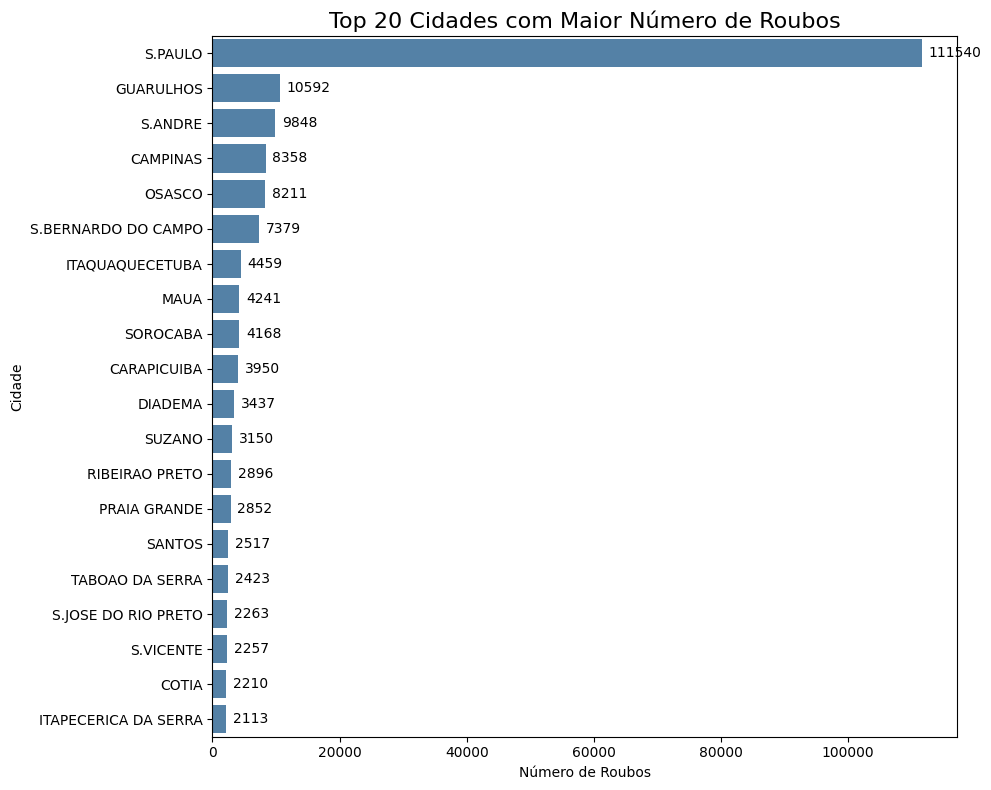

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ordenando os valores de forma decrescente
df_top_cidades_pandas = df_top_cidades_pandas.sort_values(by="count", ascending=False)

# Criar o gráfico de barras horizontais
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="count", y="CIDADE", data=df_top_cidades_pandas, color="steelblue")

# Adicionar os valores à frente das barras
ax.bar_label(ax.containers[0], fmt='%d', label_type='edge', padding=5)

# Adicionando título e rótulos aos eixos
plt.title("Top 20 Cidades com Maior Número de Roubos", fontsize=16)
plt.xlabel("Número de Roubos")
plt.ylabel("Cidade")

# Ajustar o layout e exibir o gráfico
plt.tight_layout()
plt.show()

In [26]:
# Verificando as cores de automóveis mais subtraídos
df_selecionado.where(col("DESCR_TIPO_VEICULO") == "Automovel").groupBy("DESC_COR_VEICULO").count().orderBy("count", ascending=False).show()

+----------------+-----+
|DESC_COR_VEICULO|count|
+----------------+-----+
|           Prata|29912|
|          Branco|29500|
|           Preta|23296|
|           Cinza|18888|
|        Vermelho|10518|
|            Azul| 5753|
|           Verde| 3287|
|            Bege|  914|
|          Marrom|  576|
|         Dourada|  190|
|         Amarelo|  168|
|         Laranja|  167|
|        Fantasia|   56|
|            Roxa|   52|
|           Grena|   31|
|   Não Informado|    4|
|            Rosa|    1|
+----------------+-----+



In [27]:
# Selecionando as cores de automóveis mais subtraídos
df_top_cor = df_selecionado.where(col("DESCR_TIPO_VEICULO")=="Automovel")\
  .groupBy("DESC_COR_VEICULO")\
  .count()\
  .orderBy(col("count").desc())\
  .limit(20)

In [28]:
# Convertendo o dataframe do PySpark para df Pandas
df_top_cor_pandas = df_top_cor.toPandas()

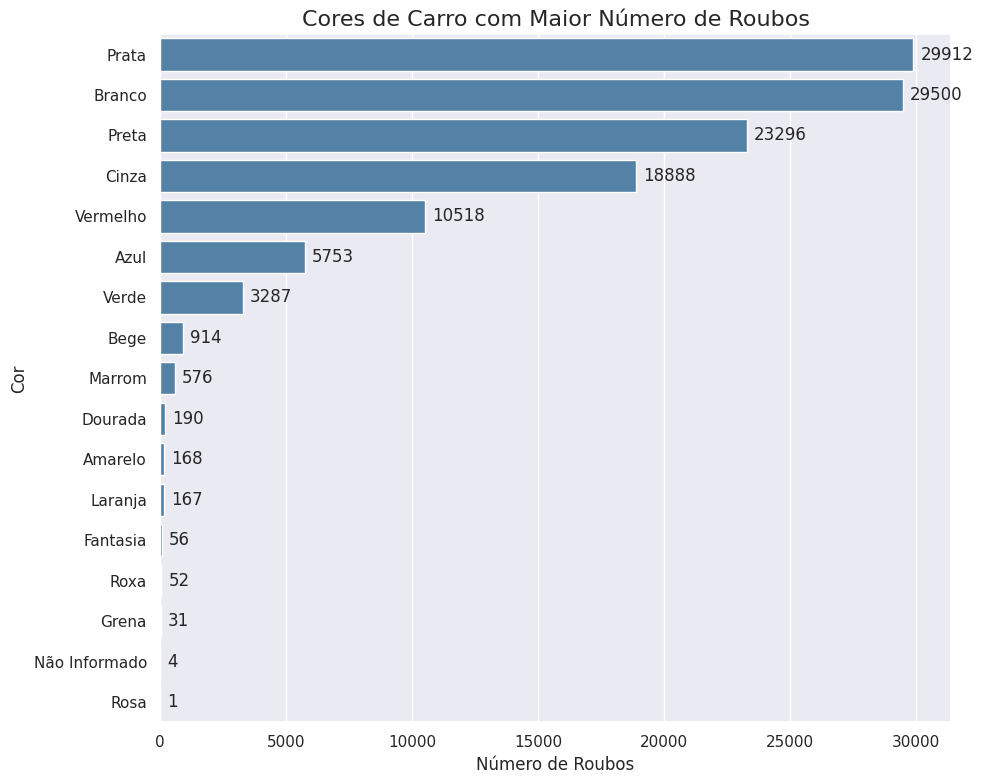

In [29]:
# Ordenando os valores do maior para o menor
df_top_cor_pandas = df_top_cor_pandas.sort_values(by="count", ascending=False)

# Definir o estilo do gráfico
sns.set_theme()

# Criar o gráfico de barras horizontais
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="count", y="DESC_COR_VEICULO", data=df_top_cor_pandas, color="steelblue")

# Adicionar os valores à frente das barras
ax.bar_label(ax.containers[0], fmt='%d', label_type='edge', padding=5)

# Adicionar título e rótulos aos eixos
plt.title("Cores de Carro com Maior Número de Roubos", fontsize=16)
plt.xlabel("Número de Roubos")
plt.ylabel("Cor")

# Ajustar o layout e exibir o gráfico
plt.tight_layout()
plt.show()

In [30]:
# Verificando os modelos de automoveis mais subtraidos
df_selecionado.where(col("DESCR_TIPO_VEICULO") == "Automovel").groupBy("MARCA_VEICULO").count().orderBy("count", ascending=False).show(truncate=False)

+---------------+-----+
|MARCA_VEICULO  |count|
+---------------+-----+
|VW/GOL         |8221 |
|HYUNDAI/HB20   |6355 |
|FIAT/UNO       |6125 |
|GM/CORSA       |5913 |
|CHEVROLET/ONIX |4721 |
|FORD/KA        |4587 |
|FIAT/PALIO     |3816 |
|FIAT/ARGO      |3521 |
|FIAT/MOBI      |2748 |
|I/FIAT         |2733 |
|VW/FOX         |2614 |
|RENAULT/SANDERO|2275 |
|CHEV/ONIX      |2213 |
|FORD/FIESTA    |2104 |
|I/VW           |1977 |
|HONDA/FIT      |1878 |
|RENAULT/KWID   |1875 |
|I/HYUNDAI      |1723 |
|CHEV/PRISMA    |1681 |
|VW/VOYAGE      |1623 |
+---------------+-----+
only showing top 20 rows



In [31]:
df_top_marca = df_selecionado\
  .where(col("DESCR_TIPO_VEICULO") == "Automovel")\
  .groupBy("MARCA_VEICULO")\
  .count()\
  .orderBy(col("count").desc())\
  .limit(20)

In [32]:
# Convertendo o dataframe do PySpark para dataframe Pandas
df_top_marca_pandas = df_top_marca.toPandas()

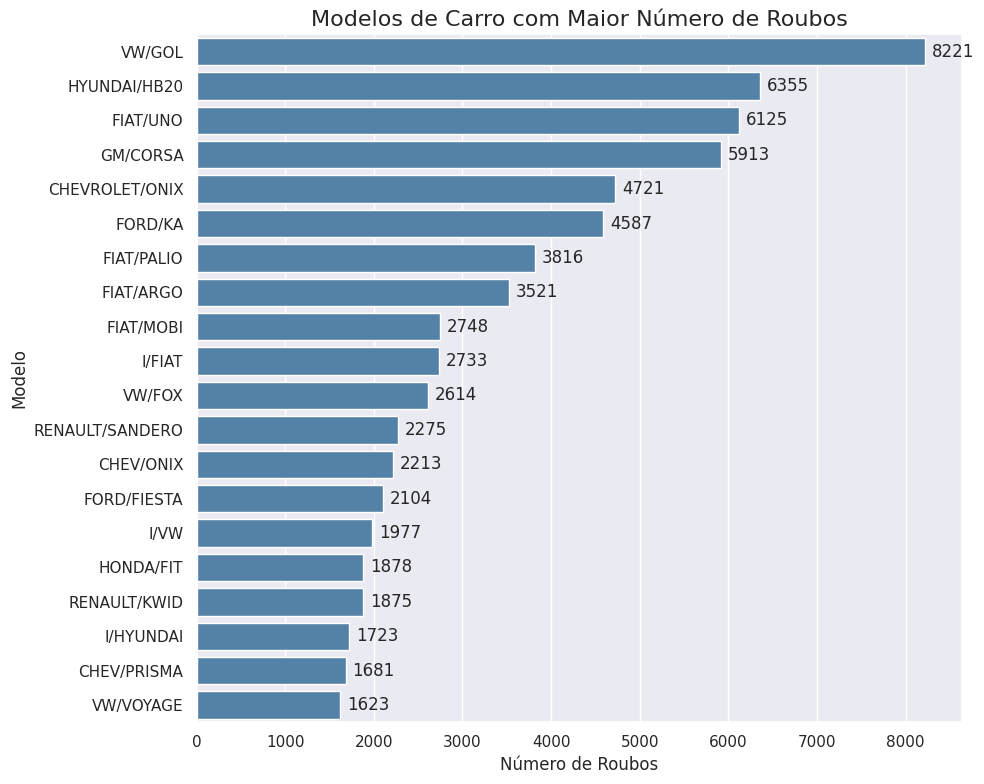

In [33]:
# Ordenando os valores do maior para o menor
df_top_marca_pandas = df_top_marca_pandas.sort_values(by="count", ascending=False)

# Definir o estilo do gráfico
sns.set_theme()

# Criar o gráfico de barras horizontais
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="count", y="MARCA_VEICULO", data=df_top_marca_pandas, color="steelblue")

# Adicionar os valores à frente das barras
ax.bar_label(ax.containers[0], fmt='%d', label_type='edge', padding=5)

# Adicionar título e rótulos aos eixos
plt.title("Modelos de Carro com Maior Número de Roubos", fontsize=16)
plt.xlabel("Número de Roubos")
plt.ylabel("Modelo")

# Ajustar o layout e exibir o gráfico
plt.tight_layout()
plt.show()

In [34]:
# Extraindo apenas o valor da hora da coluna "Horario"
df_selecionado = df_selecionado.withColumn("HORA", split(df_selecionado["HORA_OCORRENCIA"], ":").getItem(0))
df_selecionado.show()

+-------+---------------+------------------+---------------+------------------------+------------------+--------------------+----------------+---+-------------+----+
| CIDADE|HORA_OCORRENCIA|DATA_OCORRENCIA_BO|DESCR_TIPOLOCAL|DESCR_OCORRENCIA_VEICULO|DESCR_TIPO_VEICULO| DESCR_MARCA_VEICULO|DESC_COR_VEICULO|MES|MARCA_VEICULO|HORA|
+-------+---------------+------------------+---------------+------------------------+------------------+--------------------+----------------+---+-------------+----+
|S.PAULO|       16:30:00|        2024-01-04|    Via Pública|                 Roubado|         Automovel|I/BMW 320I GRAN T...|          Branco|  1|        I/BMW|  16|
|S.PAULO|       16:30:00|        2024-01-04|    Via Pública|                 Roubado|         Automovel|I/BMW 320I GRAN T...|          Branco|  1|        I/BMW|  16|
|S.PAULO|       16:30:00|        2024-01-04|    Via Pública|                 Roubado|         Automovel|I/BMW 320I GRAN T...|          Branco|  1|        I/BMW|  16|
|S.P

In [35]:
# Filtrando os valores nulos da coluna "HORA"
df_filtrado = df_selecionado.filter(col("HORA").isNotNull())

# Verificando os valores únicos da coluna "HORA"
df_filtrado.select("HORA").distinct().show(24, truncate=False)

+----+
|HORA|
+----+
|07  |
|15  |
|11  |
|01  |
|22  |
|16  |
|18  |
|00  |
|17  |
|09  |
|05  |
|19  |
|23  |
|08  |
|03  |
|02  |
|06  |
|20  |
|10  |
|12  |
|04  |
|13  |
|21  |
|14  |
+----+



In [36]:
# Criando uma visualização com base no horario da subtração
df_hora_subtracao = df_filtrado\
  .groupBy("HORA")\
  .count()\
  .orderBy(col("HORA"))

df_hora_subtracao.show(24)

+----+-----+
|HORA|count|
+----+-----+
|  00| 8094|
|  01| 7830|
|  02| 7468|
|  03| 6736|
|  04| 6164|
|  05| 6160|
|  06| 6664|
|  07| 7404|
|  08| 8241|
|  09| 9989|
|  10|11763|
|  11|12179|
|  12|10842|
|  13|10171|
|  14|11247|
|  15|11364|
|  16|10748|
|  17|10523|
|  18|11085|
|  19|14528|
|  20|17388|
|  21|15811|
|  22|14250|
|  23|11396|
+----+-----+



In [37]:
# Convertendo o dataframe do PySpark para dataframe Pandas
df_hora_subtracao_pandas = df_hora_subtracao.toPandas()

<ipython-input-38-1b812a01a1bc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_hora_subtracao_pandas, x='HORA', y='count', palette='Blues_d')


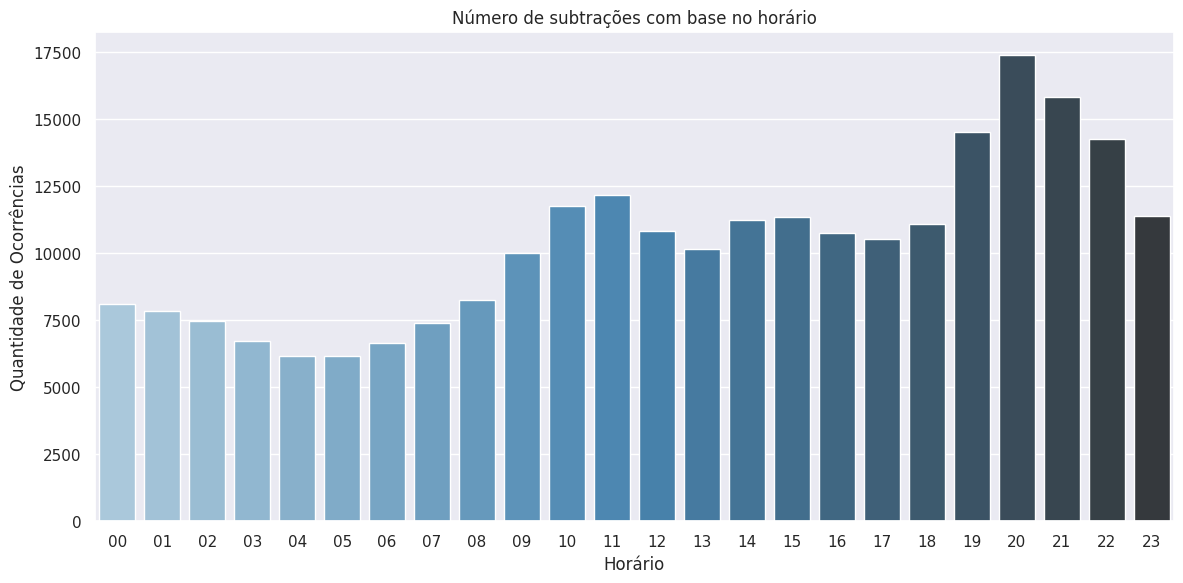

In [38]:
# Plotando o gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=df_hora_subtracao_pandas, x='HORA', y='count', palette='Blues_d')
plt.xticks(rotation=0)
plt.xlabel("Horário")
plt.ylabel("Quantidade de Ocorrências")
plt.title("Número de subtrações com base no horário")
plt.tight_layout()
plt.show()


In [39]:
df_selecionado.show()

+-------+---------------+------------------+---------------+------------------------+------------------+--------------------+----------------+---+-------------+----+
| CIDADE|HORA_OCORRENCIA|DATA_OCORRENCIA_BO|DESCR_TIPOLOCAL|DESCR_OCORRENCIA_VEICULO|DESCR_TIPO_VEICULO| DESCR_MARCA_VEICULO|DESC_COR_VEICULO|MES|MARCA_VEICULO|HORA|
+-------+---------------+------------------+---------------+------------------------+------------------+--------------------+----------------+---+-------------+----+
|S.PAULO|       16:30:00|        2024-01-04|    Via Pública|                 Roubado|         Automovel|I/BMW 320I GRAN T...|          Branco|  1|        I/BMW|  16|
|S.PAULO|       16:30:00|        2024-01-04|    Via Pública|                 Roubado|         Automovel|I/BMW 320I GRAN T...|          Branco|  1|        I/BMW|  16|
|S.PAULO|       16:30:00|        2024-01-04|    Via Pública|                 Roubado|         Automovel|I/BMW 320I GRAN T...|          Branco|  1|        I/BMW|  16|
|S.P

In [40]:
from pyspark.sql.functions import to_date

# Convertendo a coluna "DATA_OCORRENCIA_BO" para o tipo data
df_selecionado = df_selecionado.withColumn("DATA_OCORRENCIA_BO", to_date("DATA_OCORRENCIA_BO", "yyyy-MM-dd"))

In [41]:
from pyspark.sql.functions import date_format

# Selecionando ocorrências ocorridas apenas em 2024
df_2024 = df_selecionado.filter((col("DATA_OCORRENCIA_BO") >= lit("2024-01-01")) & (col("DATA_OCORRENCIA_BO") <= lit("2024-12-31")))

# Criar uma nova coluna com ano e mês no formato "yyyy-MM"
df_2024 = df_2024.withColumn("ANO_MES", date_format("DATA_OCORRENCIA_BO", "MM/yyyy"))

# Agrupar por essa nova coluna e contar ocorrências
df_2024_agrupado = df_2024.groupBy("ANO_MES").count().orderBy("ANO_MES")

In [42]:
df_2024_agrupado.show()

+-------+-----+
|ANO_MES|count|
+-------+-----+
|01/2024|23398|
|02/2024|21870|
|03/2024|22590|
|04/2024|23050|
|05/2024|23402|
|06/2024|22076|
|07/2024|23076|
|08/2024|22573|
|09/2024|22209|
|10/2024|23055|
|11/2024|21944|
|12/2024|22118|
+-------+-----+



<ipython-input-43-52df0de19365>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_grafico, x="ANO_MES", y = "count", palette="Blues_d")


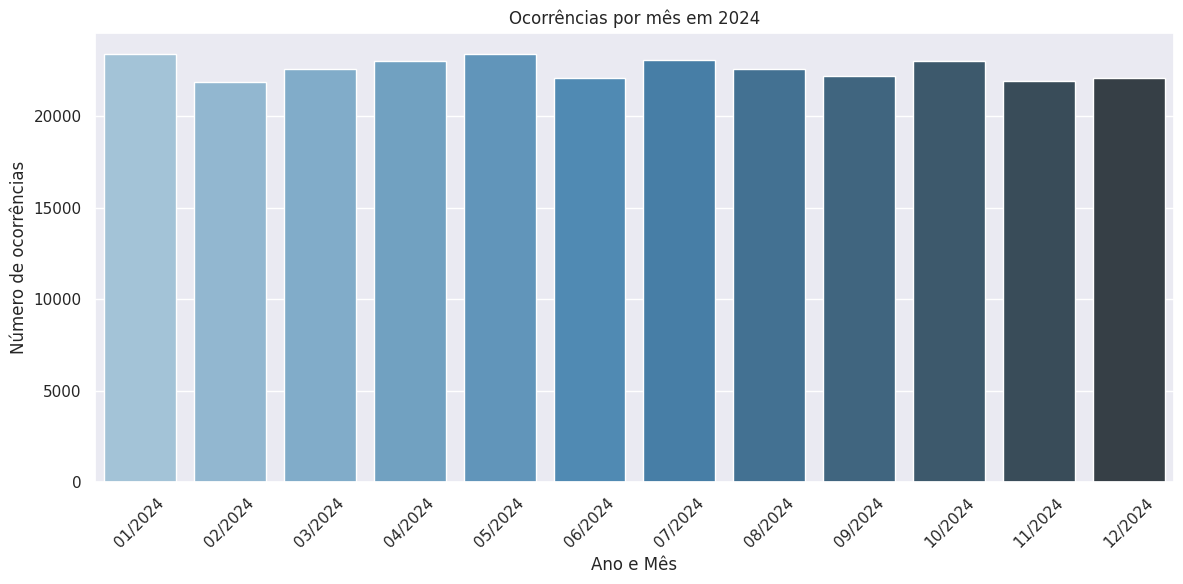

In [43]:
# Gerando um gráfico de barras

# Convertendo o dataframe PySpark para um Pandas
df_grafico = df_2024_agrupado.toPandas()

# Plotando o gráfico
plt.figure(figsize=(12,6))
sns.barplot(data=df_grafico, x="ANO_MES", y = "count", palette="Blues_d")

# Ajustando o layout do gráfico
plt.xticks(rotation=45)
plt.xlabel("Ano e Mês")
plt.ylabel("Número de ocorrências")
plt.title("Ocorrências por mês em 2024")
plt.tight_layout()
plt.show()

In [44]:
# Verificando os veículos mais subtraídos por tipo

df_selecionado.groupBy("DESCR_TIPO_VEICULO").count().orderBy("count", ascending=False).show()

+------------------+------+
|DESCR_TIPO_VEICULO| count|
+------------------+------+
|         Automovel|123313|
|         Motociclo| 93874|
|       Caminhonete| 19021|
|         Camioneta|  7991|
|          Caminhão|  6722|
|      Semi-reboque|  6002|
|          Motoneta|  5635|
|   Caminhão trator|  5370|
|        Utilitário|  3311|
|     Não informado|  1096|
|           Reboque|   938|
|      Trator rodas|   597|
|      Micro-onibus|   550|
|         Ciclomoto|    75|
|            Onibus|    69|
|      Trator misto|    62|
|       Inexistente|    44|
|   Trator esteiras|    21|
|       Quadriciclo|    16|
|         Bicicleta|    12|
+------------------+------+
only showing top 20 rows



<ipython-input-45-978298a59eb4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="count", y="DESCR_TIPO_VEICULO", data=df_tipos_veiculos, palette="Blues_d")


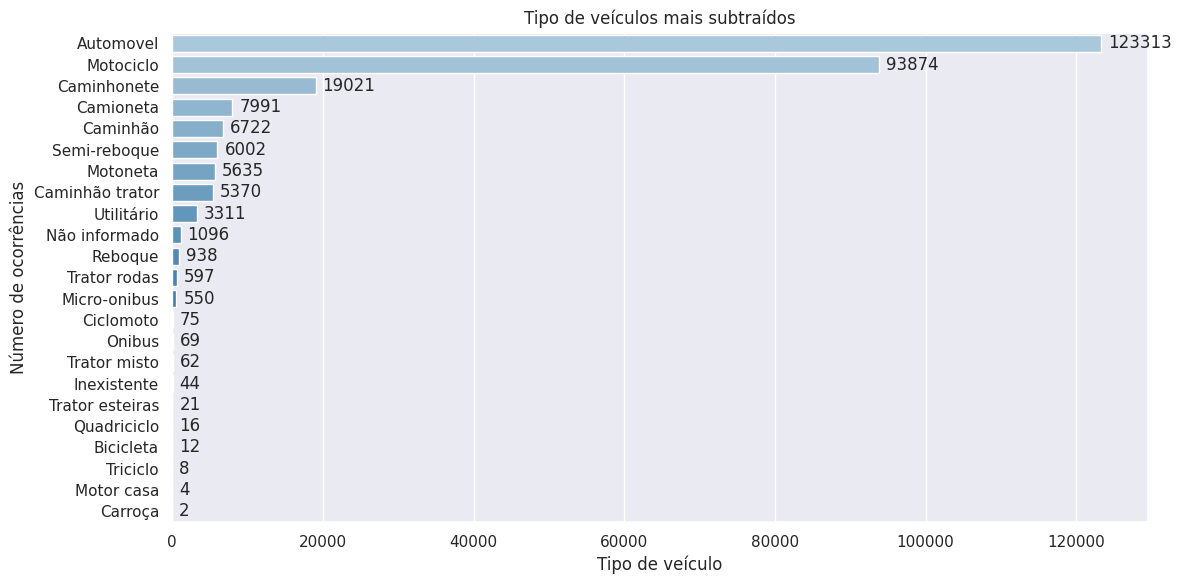

In [45]:
# Gerando um grafico de barras horizontais

# Convertendo o dataframe PySpark para um dataframe pandas

df_tipos_veiculos = df_selecionado.groupBy("DESCR_TIPO_VEICULO").count().orderBy("count", ascending=False).toPandas()

# Plotando o gráfico
plt.figure(figsize=(12,6))
ax = sns.barplot(x="count", y="DESCR_TIPO_VEICULO", data=df_tipos_veiculos, palette="Blues_d")

# Adicionando os valores à frente das barras (gráfico horizontal)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=5)

# Adicionando título e rótulos aos eixos
plt.title("Tipo de veículos mais subtraídos")
plt.xlabel("Tipo de veículo")
plt.ylabel("Número de ocorrências")

# Ajustar o layout e exibir o gráfico
plt.tight_layout()
plt.show()